# Navie Bayes Theorem

In [1]:
# importing libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#importing dataset
data = pd.read_csv('Social_Network_Ads.csv')

In [3]:
# making feature matrix
X = data.iloc[:,[2,3]].values
y = data.iloc[:,4].values

In [4]:
# splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [5]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [6]:
# fitting classifier to the training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [7]:
# Predicting the test set results
y_pred = classifier.predict(X_test)

In [8]:
pd.DataFrame([y_pred,y_test],index=["y_pred", "y_test"])

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
y_pred,0,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,1,1,1
y_test,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,1,1,1


In [9]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[64,  4],
       [ 5, 27]], dtype=int64)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


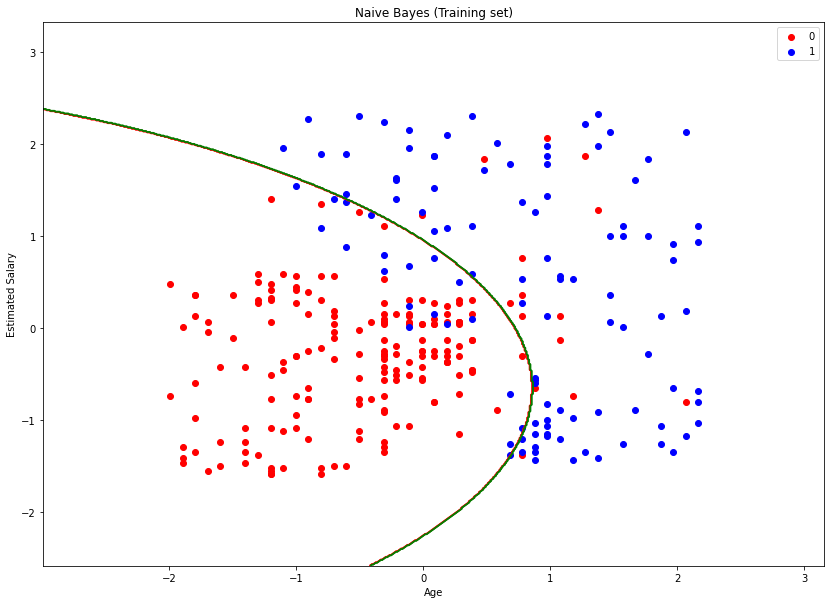

In [10]:
# Visaulizing the Training set Results
plt.figure(figsize=(14,10))
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1,X2 = np.meshgrid(np.arange(start= X_set[:,0].min()-1, stop= X_set[:,0].max()+1,step=0.01),
                   np.arange(start= X_set[:,1].min()-1, stop= X_set[:,1].max()+1,step=0.01))
plt.contour(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
           alpha=0.75,cmap=ListedColormap(['red','green']))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(['red','blue'])(i),label=j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


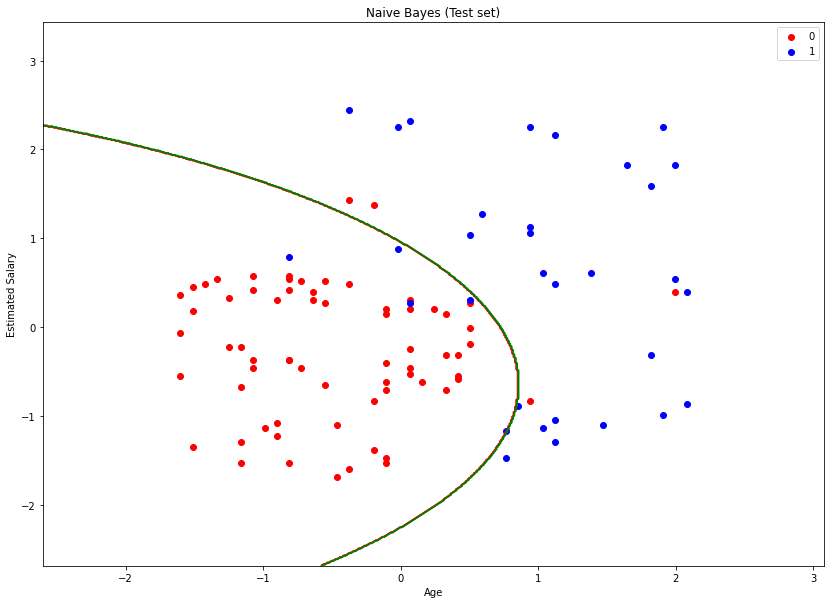

In [13]:
# Visaulizing the Test set Results
plt.figure(figsize=(14,10))
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1,X2 = np.meshgrid(np.arange(start= X_set[:,0].min()-1, stop= X_set[:,0].max()+1,step=0.01),
                   np.arange(start= X_set[:,1].min()-1, stop= X_set[:,1].max()+1,step=0.01))
plt.contour(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
           alpha=0.75,cmap=ListedColormap(['red','green']))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(['red','blue'])(i),label=j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()